By: Michał Marusiński

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

Starting of by importing preprocessed data

In [2]:
data = pd.read_csv(r"D:\Studia\Workshop\Models\valid_patients_data.csv")

In [3]:
print(data.shape)
data.head()

(18620, 14)


,trials.thisTrialN,trials.thisN,trials.thisIndex,text_4.started,image.started,mouse.started,Valence.started,Valence_rating.response,Valence_rating.rt,Valence_rating.started,Arousal.started,Arousal_rating.response,Arousal_rating.rt,Arousal_rating.started
0,0.0,0.0,173.0,87.767878,87.767878,0.001703,90.190618,3.0,14.737,0.005782,90.190618,6.0,10.296,0.005782
1,1.0,1.0,149.0,104.943973,104.943973,0.003452,107.046095,7.0,27.327,0.013047,107.046095,3.0,30.303,0.013047
2,2.0,2.0,5.0,137.397414,137.397414,0.007579,140.316976,3.0,9.902,0.012221,140.316976,5.0,5.624,0.012221
3,3.0,3.0,212.0,150.274517,150.274517,0.001352,151.598203,7.0,12.557,0.014221,151.598203,3.0,5.729,0.014221
4,4.0,4.0,9.0,164.203495,164.203495,0.010700,166.333420,5.0,9.221,0.013314,166.333420,4.0,2.346,0.013314


In [4]:
def valence_apply(row):
        return 'low valence' if row in list(range(1,5,1)) else 'high valence'
def arousal_apply(row):
        return 'low arousal' if row in list(range(1,5,1)) else 'high arousal'

In [5]:
data['Valence behaviour'] = data['Valence_rating.response'].apply(valence_apply)
data['Arousal behaviour'] = data['Arousal_rating.response'].apply(arousal_apply)

Creating machine learning models - starting of with data selection and changes: string (high / low) --> binary(1 / 0) and deleting response rating columns

In [6]:
data['Valence behaviour'] = np.where( data['Valence behaviour'] == 'high valence', 1, 0)
data['Arousal behaviour'] = np.where( data['Arousal behaviour'] == 'high arousal', 1, 0)

#deleting response ratings columns
data.drop(['Valence_rating.response', 'Arousal_rating.response'], inplace = True, axis = 1)
#useless column
data.drop('trials.thisIndex', inplace = True, axis = 1)

In [7]:
data.columns

Index(['trials.thisTrialN', 'trials.thisN', 'text_4.started', 'image.started',
       'mouse.started', 'Valence.started', 'Valence_rating.rt',
       'Valence_rating.started', 'Arousal.started', 'Arousal_rating.rt',
       'Arousal_rating.started', 'Valence behaviour', 'Arousal behaviour'],
      dtype='object')

In [8]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_predict
from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from lightgbm import LGBMClassifier

Choose a target data to be predicted

In [9]:
target = 'Valence behaviour'
target_name = target.split(' ')[0]

Basic split of the data - we choose here split 80 / 20

In [10]:
X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In case of kNN and SVM use, we need to rescale the values to make it adjustable for algorithms.
For others, it's optional as their efficiency may improve. Here we do not rescale values, so only 4 of the algorithms will be used - LightGBM, RF, DT, XGBoost

In [11]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Implementation of classifiers with non-specific hyperparameters

In [12]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lgbm = LGBMClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC()


models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm", knn : "knn", svm : "svm"}

In a loop, Fitting each of them to training values

Accuracy: 0.6511815252416756
Classification Report:
              precision    recall  f1-score   support

           0       0.40      0.15      0.22      1211
           1       0.69      0.89      0.78      2513

    accuracy                           0.65      3724
   macro avg       0.54      0.52      0.50      3724
weighted avg       0.59      0.65      0.59      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\random_forest\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\random_forest\confusion_matrix_Valence_standarized.png


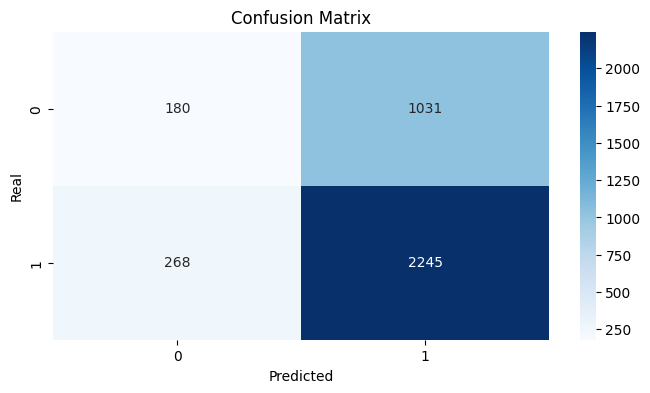

Accuracy: 0.5631041890440387
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.38      0.36      1211
           1       0.69      0.65      0.67      2513

    accuracy                           0.56      3724
   macro avg       0.51      0.52      0.51      3724
weighted avg       0.57      0.56      0.57      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\decision_tree\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\decision_tree\confusion_matrix_Valence_standarized.png


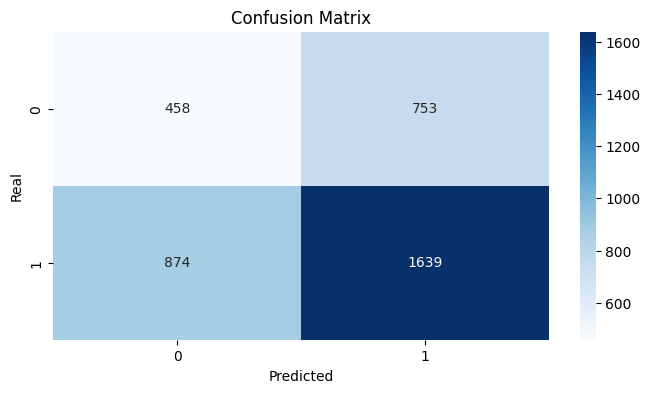

Accuracy: 0.6364124597207304
Classification Report:
              precision    recall  f1-score   support

           0       0.36      0.16      0.22      1211
           1       0.68      0.87      0.76      2513

    accuracy                           0.64      3724
   macro avg       0.52      0.51      0.49      3724
weighted avg       0.58      0.64      0.59      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\xgboost\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\xgboost\confusion_matrix_Valence_standarized.png


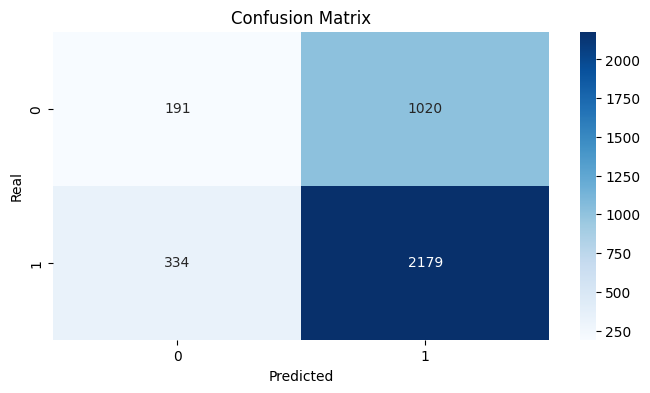

[LightGBM] [Info] Number of positive: 9909, number of negative: 4987
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000248 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 14896, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.665212 -> initscore=0.686609
[LightGBM] [Info] Start training from score 0.686609
Accuracy: 0.6654135338345865
Classification Report:
              precision    recall  f1-score   support

           0       0.41      0.07      0.12      1211
           1       0.68      0.95      0.79      2513

    accuracy                           0.67      3724
   macro avg       0.55      0.51      0.46      3724
weighted avg       0.59      0.67      0.57      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\lightgbm\classification_re

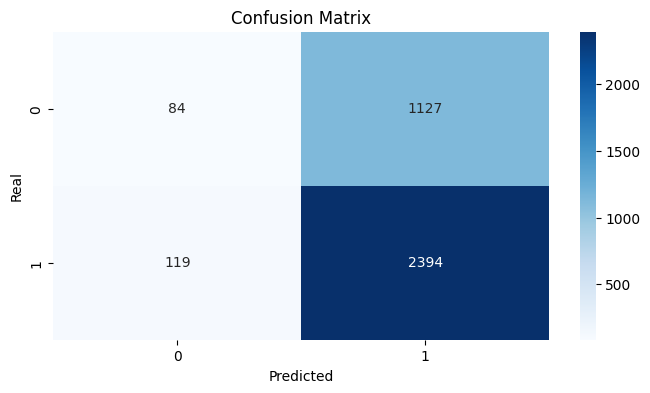

Accuracy: 0.6017722878625135
Classification Report:
              precision    recall  f1-score   support

           0       0.34      0.24      0.29      1211
           1       0.68      0.77      0.72      2513

    accuracy                           0.60      3724
   macro avg       0.51      0.51      0.50      3724
weighted avg       0.57      0.60      0.58      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\knn\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\knn\confusion_matrix_Valence_standarized.png


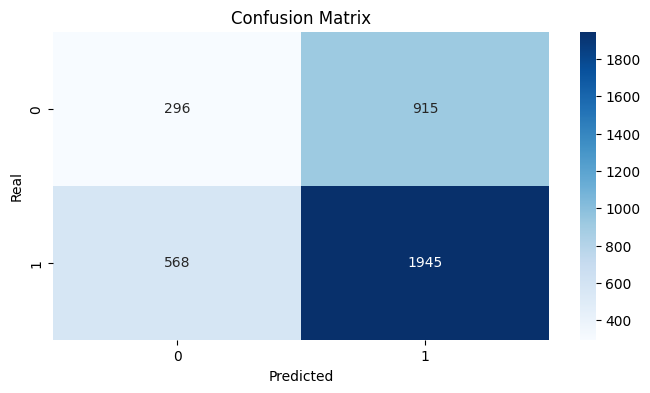

Accuracy: 0.674812030075188
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1211
           1       0.67      1.00      0.81      2513

    accuracy                           0.67      3724
   macro avg       0.34      0.50      0.40      3724
weighted avg       0.46      0.67      0.54      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\svm\classification_report_Valence_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\svm\confusion_matrix_Valence_standarized.png


c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

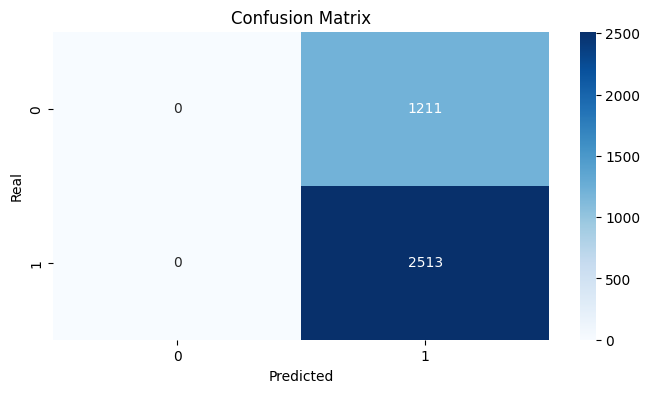

In [13]:
import model_eval

for model, model_name in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred, name_of_classifier=model_name, feature_predicted = target_name, standarized = True)


Implementation of same models but with tuners included ( 10 - K Validation with Tuner)

In [14]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
knn = KNeighborsClassifier()
svm = SVC()

models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm", knn : "knn", svm : "svm"}


We import all the param_grids necessary for GridSearch Tuner from module file - param_grids

In [15]:
from param_grids import param_grids

RandomForestClassifier()
Accuracy: 0.6667561761546724
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.02      0.04      1211
           1       0.67      0.98      0.80      2513

    accuracy                           0.67      3724
   macro avg       0.49      0.50      0.42      3724
weighted avg       0.56      0.67      0.55      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\random_forest\classification_report_Valence_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\random_forest\confusion_matrix_Valence_standarized_cross_validation.png


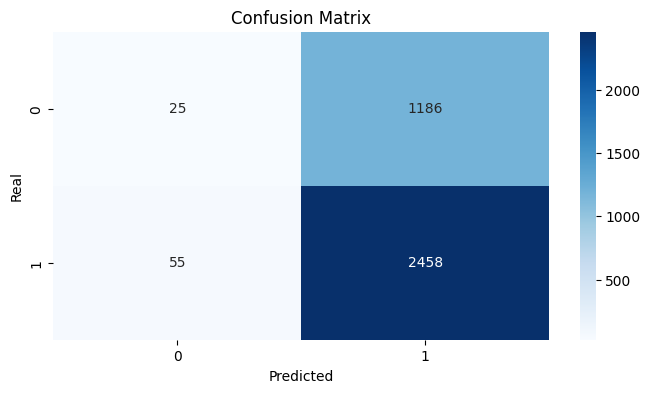

DecisionTreeClassifier()
Accuracy: 0.6374865735767992
Classification Report:
              precision    recall  f1-score   support

           0       0.31      0.09      0.14      1211
           1       0.67      0.90      0.77      2513

    accuracy                           0.64      3724
   macro avg       0.49      0.50      0.46      3724
weighted avg       0.55      0.64      0.57      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\decision_tree\classification_report_Valence_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\decision_tree\confusion_matrix_Valence_standarized_cross_validation.png


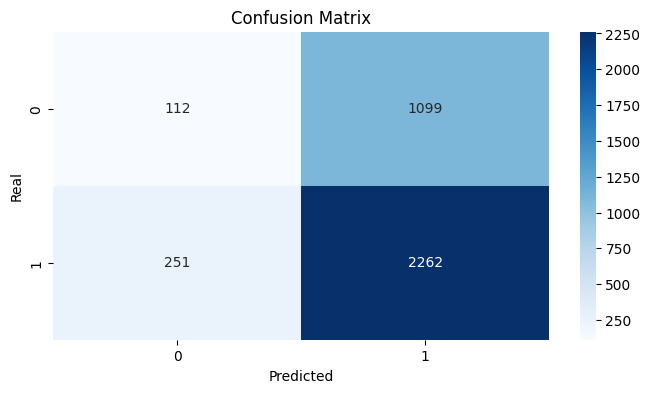

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.6715896885069818
Classification Report:
              precision    recall  f1-score   support

           0       0.27      0.01      0.01      1211
           1       0.67      0.99      0.80      2513

    accuracy              

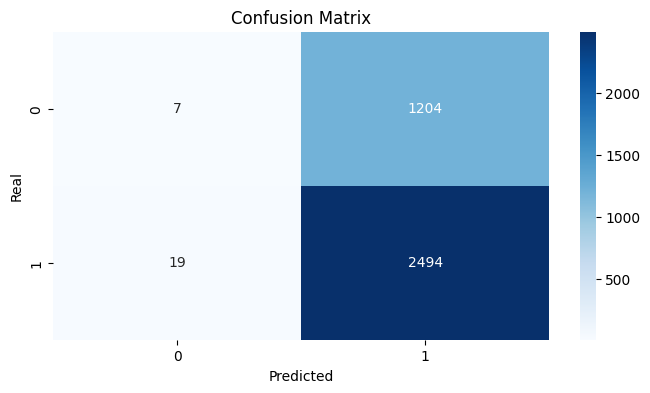

LGBMClassifier()
[LightGBM] [Info] Number of positive: 8918, number of negative: 4488
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000436 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.665225 -> initscore=0.686665
[LightGBM] [Info] Start training from score 0.686665
[LightGBM] [Info] Number of positive: 8918, number of negative: 4488
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000306 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.665225 -> initscore=0.686665
[LightGBM] [Info] Start training from score 0.686665
[Li

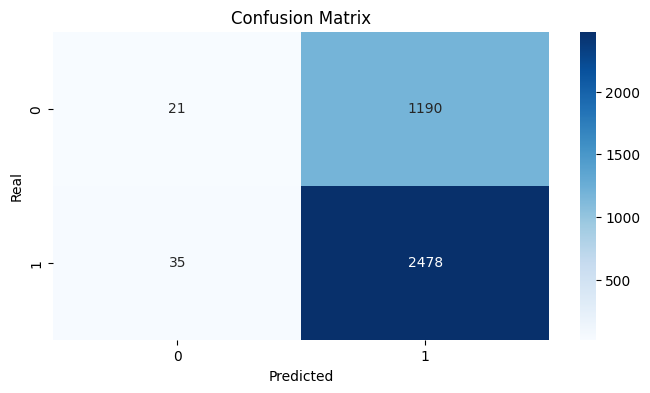

KNeighborsClassifier()
Accuracy: 0.6192266380236305
Classification Report:
              precision    recall  f1-score   support

           0       0.33      0.17      0.22      1211
           1       0.68      0.84      0.75      2513

    accuracy                           0.62      3724
   macro avg       0.50      0.50      0.49      3724
weighted avg       0.56      0.62      0.58      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\knn\classification_report_Valence_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\knn\confusion_matrix_Valence_standarized_cross_validation.png


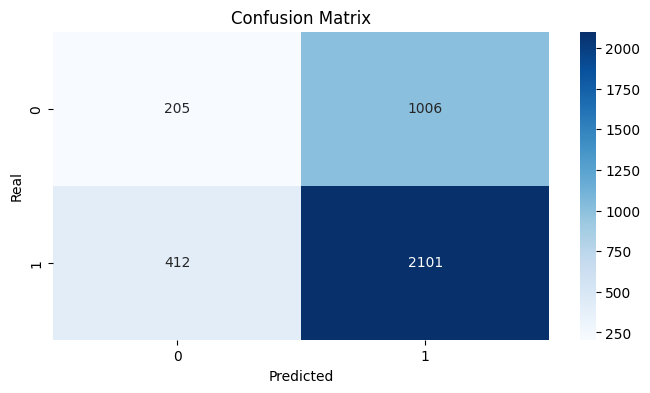

SVC()
Accuracy: 0.6753490870032224
Classification Report:
              precision    recall  f1-score   support

           0       0.55      0.01      0.02      1211
           1       0.68      1.00      0.81      2513

    accuracy                           0.68      3724
   macro avg       0.61      0.50      0.41      3724
weighted avg       0.63      0.68      0.55      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\svm\classification_report_Valence_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\svm\confusion_matrix_Valence_standarized_cross_validation.png


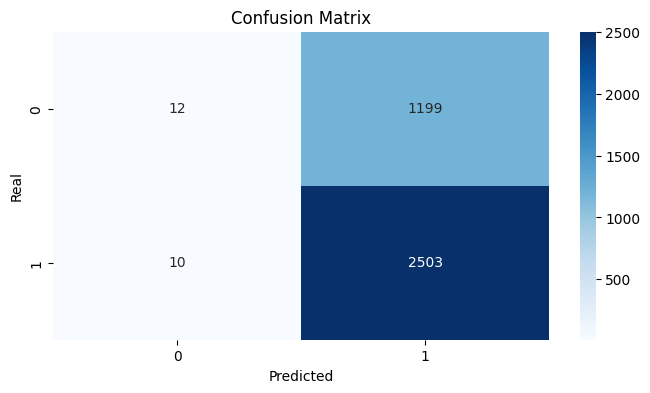

In [16]:
for model, model_name in models.items():
    print(model)
    grid_search = GridSearchCV(param_grid = param_grids[model_name], estimator = model, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred_cv = cross_val_predict(best_clf, X_test, y_test, cv=10)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred_cv,
                          name_of_classifier=model_name,
                          feature_predicted = target_name,
                          cross_validation = True,
                          standarized = True)

We change our target from Valence behaviour to Arousal

In [17]:
target = 'Arousal behaviour'
target_name = target.split(" ")[0]

X = data.drop(columns = ['Valence behaviour', 'Arousal behaviour'])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

In [18]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [19]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
dt = DecisionTreeClassifier(random_state=42)
xgb = XGBClassifier(use_label_encoder=False, eval_metric='mlogloss')
lgbm = LGBMClassifier()
knn = KNeighborsClassifier(n_neighbors=5)
svm = SVC()


models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm", knn : "knn", svm : "svm"}

Accuracy: 0.6928034371643395
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.92      0.81      2593
           1       0.48      0.18      0.27      1131

    accuracy                           0.69      3724
   macro avg       0.60      0.55      0.54      3724
weighted avg       0.65      0.69      0.64      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\random_forest\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\random_forest\confusion_matrix_Arousal_standarized.png


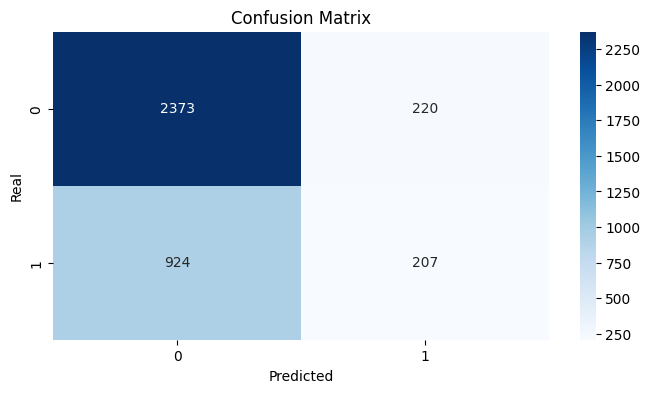

Accuracy: 0.6031149301825993
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.69      0.71      2593
           1       0.36      0.40      0.38      1131

    accuracy                           0.60      3724
   macro avg       0.54      0.55      0.54      3724
weighted avg       0.62      0.60      0.61      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\decision_tree\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\decision_tree\confusion_matrix_Arousal_standarized.png


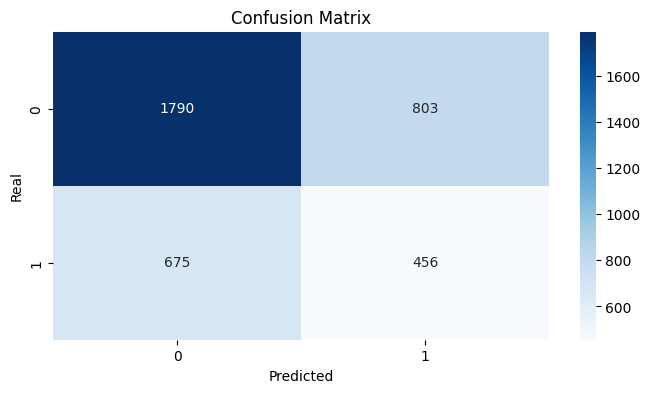

Accuracy: 0.6868958109559613
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.89      0.80      2593
           1       0.47      0.23      0.31      1131

    accuracy                           0.69      3724
   macro avg       0.60      0.56      0.55      3724
weighted avg       0.65      0.69      0.65      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\xgboost\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\xgboost\confusion_matrix_Arousal_standarized.png


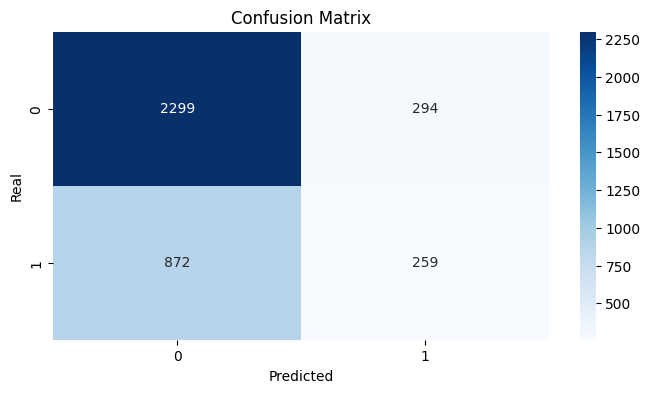

[LightGBM] [Info] Number of positive: 4670, number of negative: 10226
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000341 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 14896, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313507 -> initscore=-0.783774
[LightGBM] [Info] Start training from score -0.783774
Accuracy: 0.69656283566058
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      2593
           1       0.50      0.11      0.17      1131

    accuracy                           0.70      3724
   macro avg       0.61      0.53      0.49      3724
weighted avg       0.65      0.70      0.62      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\lightgbm\classification_r

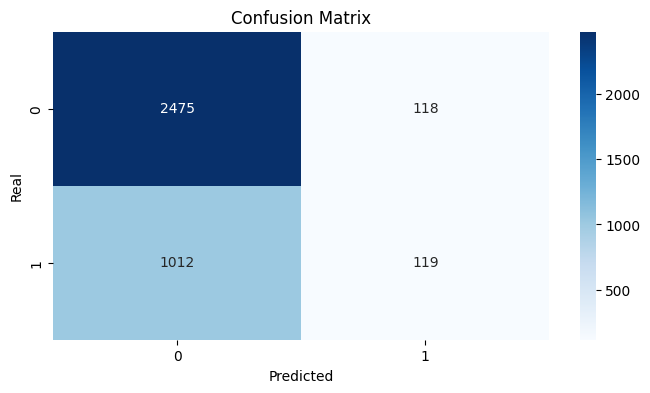

Accuracy: 0.6616541353383458
Classification Report:
              precision    recall  f1-score   support

           0       0.73      0.82      0.77      2593
           1       0.42      0.30      0.35      1131

    accuracy                           0.66      3724
   macro avg       0.57      0.56      0.56      3724
weighted avg       0.63      0.66      0.64      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\knn\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\knn\confusion_matrix_Arousal_standarized.png


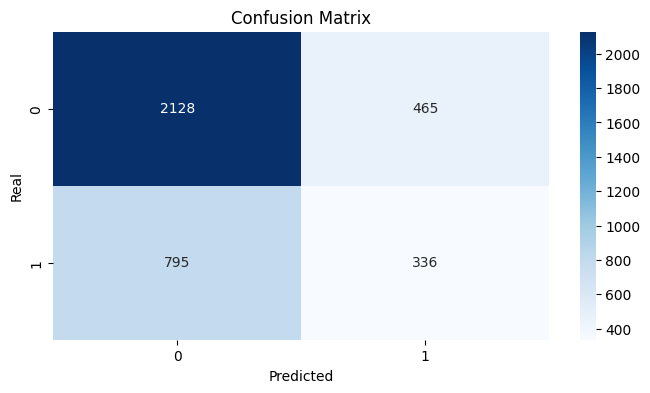

Accuracy: 0.6960257787325457
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      2593
           1       0.00      0.00      0.00      1131

    accuracy                           0.70      3724
   macro avg       0.35      0.50      0.41      3724
weighted avg       0.48      0.70      0.57      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\svm\classification_report_Arousal_standarized.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\svm\confusion_matrix_Arousal_standarized.png


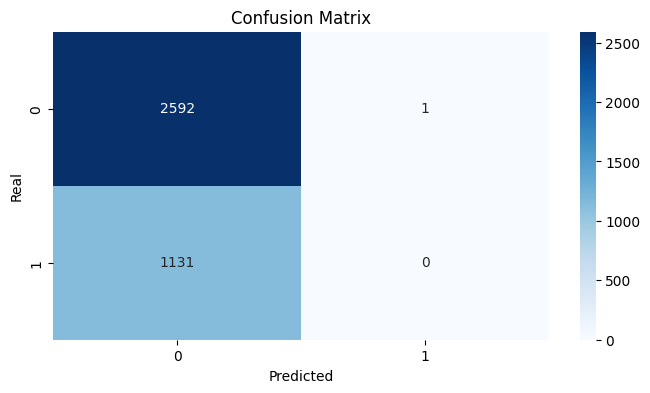

In [20]:
import model_eval

for model, model_name in models.items():
    
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred,
                          name_of_classifier=model_name,
                          feature_predicted = target_name,
                          standarized = True)


In [21]:
rf = RandomForestClassifier()
dt = DecisionTreeClassifier()
xgb = XGBClassifier()
lgbm = LGBMClassifier()
knn = KNeighborsClassifier()
svm = SVC()

models = {rf : 'random_forest', dt : "decision_tree", xgb : "xgboost", lgbm : "lightgbm", knn : "knn", svm : "svm"}

RandomForestClassifier()
Accuracy: 0.6928034371643395
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.97      0.82      2593
           1       0.45      0.05      0.09      1131

    accuracy                           0.69      3724
   macro avg       0.57      0.51      0.45      3724
weighted avg       0.62      0.69      0.59      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\random_forest\classification_report_Arousal_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\random_forest\confusion_matrix_Arousal_standarized_cross_validation.png


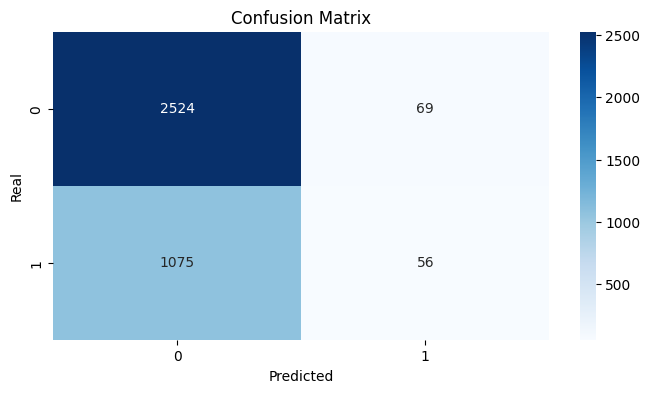

DecisionTreeClassifier()
Accuracy: 0.6632653061224489
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.87      0.78      2593
           1       0.39      0.18      0.25      1131

    accuracy                           0.66      3724
   macro avg       0.55      0.53      0.52      3724
weighted avg       0.61      0.66      0.62      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\decision_tree\classification_report_Arousal_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\decision_tree\confusion_matrix_Arousal_standarized_cross_validation.png


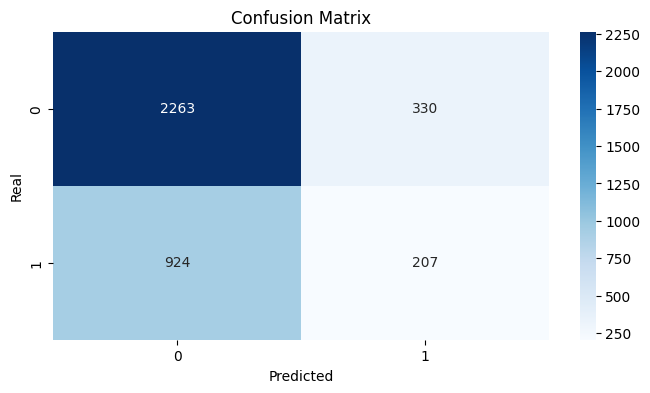

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Accuracy: 0.6903866809881848
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.95      0.81      2593
           1       0.46      0.10      0.16      1131

    accuracy              

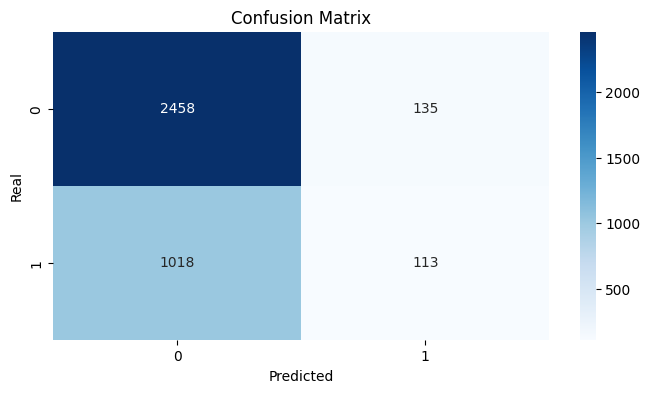

LGBMClassifier()
[LightGBM] [Info] Number of positive: 4203, number of negative: 9203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000490 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313516 -> initscore=-0.783731
[LightGBM] [Info] Start training from score -0.783731
[LightGBM] [Info] Number of positive: 4203, number of negative: 9203
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000327 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2777
[LightGBM] [Info] Number of data points in the train set: 13406, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.313516 -> initscore=-0.783731
[LightGBM] [Info] Start training from score -0.783731

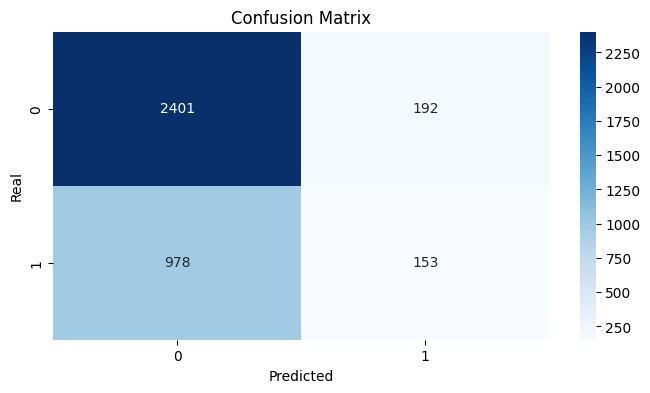

KNeighborsClassifier()
Accuracy: 0.6804511278195489
Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.93      0.80      2593
           1       0.41      0.12      0.18      1131

    accuracy                           0.68      3724
   macro avg       0.56      0.52      0.49      3724
weighted avg       0.62      0.68      0.61      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\knn\classification_report_Arousal_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\knn\confusion_matrix_Arousal_standarized_cross_validation.png


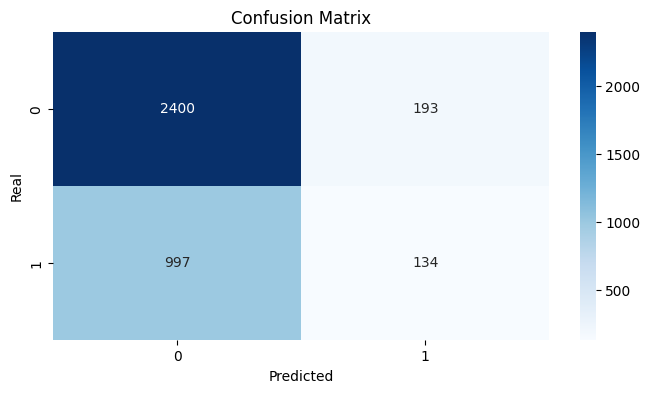

SVC()
Accuracy: 0.6962943071965628
Classification Report:
              precision    recall  f1-score   support

           0       0.70      1.00      0.82      2593
           1       0.00      0.00      0.00      1131

    accuracy                           0.70      3724
   macro avg       0.35      0.50      0.41      3724
weighted avg       0.48      0.70      0.57      3724

Accuracy score and classification report successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\svm\classification_report_Arousal_standarized_cross_validation.txt
Confusion matrix successfully saved to d:\Studia\Workshop\Models\rating 1- 4 - 9\svm\confusion_matrix_Arousal_standarized_cross_validation.png


c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\Jan\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

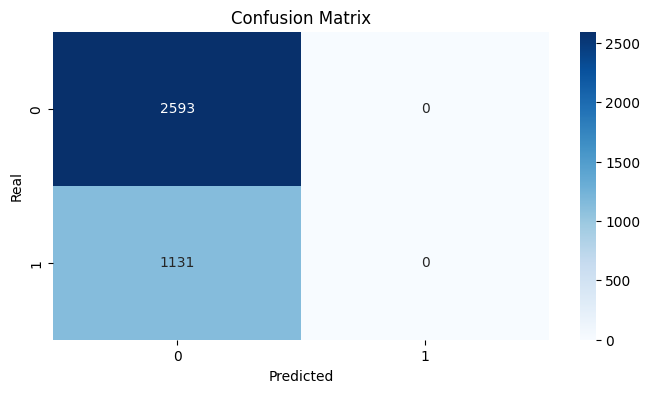

In [22]:
for model, model_name in models.items():
    print(model)
    grid_search = GridSearchCV(param_grid = param_grids[model_name], estimator = model, cv=10, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    best_clf = grid_search.best_estimator_
    y_pred_cv = cross_val_predict(best_clf, X_test, y_test, cv=10)
    model_eval.evaluation(y_test = y_test, y_pred = y_pred_cv,
                          name_of_classifier=model_name,
                          feature_predicted = target_name,
                          cross_validation = True,
                          standarized = True)